In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
Consumer_Key = "nb5VzF8M2hYRUPzPj9yjsaMeV"
Consumer_Secret_Key = "nvbStoMT2WK4k3DI7FVwNbaetpmNTAhKLvxtWur4qxekXJtNaQ"
Access_Token = "1340144467936858115-aXLW795dsyaqzsCdzkGGHObgrQu1UC"
Access_Token_Secret = "jQ6bVgYRbtDC7uavy5ib61gGxcQDWyhDXjANHQ6ZNhK64"

In [3]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [4]:
posts = api.user_timeline(screen_name="maxim", count = 2000, lang ="en", tweet_mode="extended")

# Print 30 tweet
print("Show the 30 recent tweets:\n")
i=1
for tweet in posts[:30]:
  print(str(i) +') '+ tweet.full_text + '\n')
  i= i+1

Show the 30 recent tweets:

1) Take the power back  https://t.co/LM8hyg22NE

2) Yah Yah (feat. Royce Da 5'9", Black Thought, Q-Tip &amp; Denaun) by Eminem, Royce Da 5'9", Black Thought, Q-Tip, Denaun https://t.co/KHj6b8xOLN #NowPlaying

3) https://t.co/Fl6axOLfUD

4) This Dorset Cop has totally lost the plot https://t.co/7JJJfSxXi0 via @YouTube

5) Feel Good - RE-SPIT by Maxim, Milly https://t.co/4t7i2xAYnU #NowPlaying

6) See this Instagram photo by @recurve_streetwear https://t.co/hfRKHRm35e

7) RT @MarcusRashford: Day job has well and truly worn me out so time to log off. 😴

Please keep sharing via #ENDCHILDFOODPOVERTY 
The compass…

8) White Lines (Don't Do It) by Grandmaster Flash, Grandmaster Melle Mel https://t.co/xlOgjfb9P7 #NowPlaying

9) My Way by Frank Sinatra https://t.co/P35wKPltLm #NowPlaying

10) The Boss by James Brown https://t.co/nntYJuE4KW #NowPlaying

11) Run Run by Delroy Wilson https://t.co/ZWRb7sW2J7 #NowPlaying

12) No Complex by Chino XL, King Tech, Sean Freehi

In [5]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,Take the power back https://t.co/LM8hyg22NE
1,"Yah Yah (feat. Royce Da 5'9"", Black Thought, Q..."
2,https://t.co/Fl6axOLfUD
3,This Dorset Cop has totally lost the plot http...
4,"Feel Good - RE-SPIT by Maxim, Milly https://t...."


In [6]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Take the power back
1,"Yah Yah (feat. Royce Da 5'9"", Black Thought, Q..."
2,
3,This Dorset Cop has totally lost the plot via
4,"Feel Good - RE-SPIT by Maxim, Milly NowPlaying"
...,...
97,Like it !! ✌🏾
98,
99,\n\n🤘🏾
100,: 'Lepidoptera' Mugs by from The Prodigy. Cho...


In [7]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Take the power back,0.000000,0.000000
1,"Yah Yah (feat. Royce Da 5'9"", Black Thought, Q...",0.433333,-0.166667
2,,0.000000,0.000000
3,This Dorset Cop has totally lost the plot via,0.750000,0.000000
4,"Feel Good - RE-SPIT by Maxim, Milly NowPlaying",0.600000,0.700000
...,...,...,...
97,Like it !! ✌🏾,0.000000,0.000000
98,,0.000000,0.000000
99,\n\n🤘🏾,0.000000,0.000000
100,: 'Lepidoptera' Mugs by from The Prodigy. Cho...,0.000000,0.000000


<function matplotlib.pyplot.show>

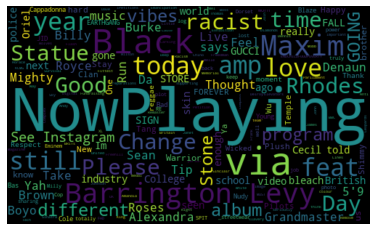

In [8]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [9]:
#Create a function to compute negative (-1), netral (0) and positive (+1) analysis
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Netral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
#Show the dataframe
df 

,Tweets,Subjectivity,Polarity,Analysis
0,Take the power back,0.000000,0.000000,Netral
1,"Yah Yah (feat. Royce Da 5'9"", Black Thought, Q...",0.433333,-0.166667,Negative
2,,0.000000,0.000000,Netral
3,This Dorset Cop has totally lost the plot via,0.750000,0.000000,Netral
4,"Feel Good - RE-SPIT by Maxim, Milly NowPlaying",0.600000,0.700000,Positive
...,...,...,...,...
97,Like it !! ✌🏾,0.000000,0.000000,Netral
98,,0.000000,0.000000,Netral
99,\n\n🤘🏾,0.000000,0.000000,Netral
100,: 'Lepidoptera' Mugs by from The Prodigy. Cho...,0.000000,0.000000,Netral


In [10]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) Feel Good - RE-SPIT by Maxim, Milly  NowPlaying

2) No Complex by Chino XL, King Tech, Sean Freehill  NowPlaying

3) Right Time - 2001 Digital Remaster by Mighty Diamonds  NowPlaying

4) Join me in supporting this important cause at iPetitions. Remove The Emancipation Memorial/Freedman Statue  via 

5) How taxpayers were still paying for British slave trade nearly 200 years later   WHAT!!!!

6) i suffered these kinda programs as a child and having to go to school and hear kids repeat the programs racist jokes thinking they were funny. So they still doing this shit today !!! fuk em, cheap gags! 

7) Netflix 'axes Mighty Boosh and League of Gentlemen over blackface scenes'  via  

never seen this program but what a bunch of dicks!

good it has been taken down

8) : Niggas wanna cry about protecting these businesses of these huge brands and cooperations from looting .... AS IF THESE STORE…

9) : Loud and clear. The world is going to become real tuff for the s

In [11]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Yah Yah (feat. Royce Da 5'9", Black Thought, Q-Tip &amp; Denaun) by Eminem, Royce Da 5'9", Black Thought, Q-Tip, Denaun  NowPlaying

2) Dave - Black (Live at The BRITs 2020)  via 

3) Black Roses by Barrington Levy  NowPlaying

4) Janet Sinclair by Little John, Billy Boyo  NowPlaying

5) It's time for Britain to think seriously about reparations for slavery | Amandla Thomas Johnson 

6) Oriel College: RHODES MUST FALL 2​.​0 - Oriel College to take down the Cecil Rhodes Statue - Sign the Petition!  via 

7) Secretary of State for Education: Make Black British History Compulsory in Schools  via 

8) Im sick of that place! 

9) : WITH ALL THE THINGS GOING ON .... IM SEEING THIS LADY CRYING OVER THE GUCCI STORE BEING BROKEN INTO  ?!!?? THE FUCKING GUCCI…

10) : I’m MAD! 

11) This guy 👑👑👑 davidgoggins - stay hard ! 👊🏾 

12) Shimmy Shimmy Ya by Ol' Dirty Bastard  NowPlaying

13) Going down in Barcelona elclassico with  andycole09   👑👑👑realmadrid fcbarcelona 

1

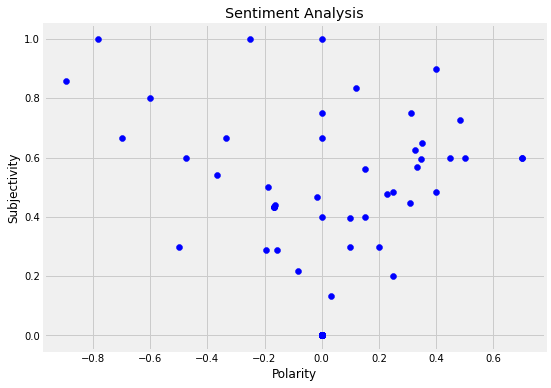

In [12]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [13]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

22.5

In [14]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

18.6

In [15]:
# Show the value counts
df['Analysis'].value_counts()

Netral      60
Positive    23
Negative    19
Name: Analysis, dtype: int64

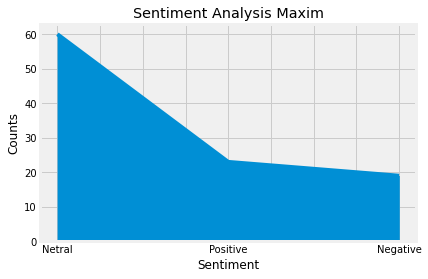

In [17]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis Maxim')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'area')
plt.show()